In [29]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)

from sklearn.preprocessing import (
    StandardScaler,
    OrdinalEncoder,
    OneHotEncoder,
    KBinsDiscretizer
)

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

import shap
import random
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SequentialFeatureSelector

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

The **Default of Credit Card Clients Dataset** is a classification problem that determines whether or not a credit card client will default next month. We expected (and found) that most of the features would be numerical, since they deal with the financial sector. The data set is quite large and expansive, consisting of 30,000 examples and 24 features. We noticed an interesting subset of the features, `PAY_X`, `BILL_AMTX`, and `PAY_AMTX`. Each column in the `PAY`, `BILL_AMT` and `PAY_AMT` sets had the same semantic meaning, but `X` referred to which month it corresponded to. The entries in this dataset were collected over the period of April to December 2005. Our initial exploration and real-world understanding of the problem identified _credit limits_, _amounts paid_, and _payment delay_ as possible key predictors for our model.  

In [31]:
credit_card_df = pd.read_csv("data/credit_card.csv", index_col=0)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [32]:
train_df, test_df = train_test_split(credit_card_df, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

In [33]:
# EDA
n_train_samples = train_df.shape[0]
n_test_samples = test_df.shape[0]

print("Number of training examples:", n_train_samples)
print("Number of test examples:", n_test_samples)

Number of training examples: 21000
Number of test examples: 9000


In [34]:
# EDA
missing_values = credit_card_df.isnull().sum()
print(missing_values[missing_values > 0].tolist())

[]


Here we check to see if the data set has any missing/`NaN` values. We see that the function returns an empty list, which means that we have no missing values in our data set.

In [35]:
# EDA
# Compute summary statistics
summary_statistics = credit_card_df.describe()
summary_statistics

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [36]:
# EDA
# Show summary of DataFrame 
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   30000 no

In [37]:
# Summary statistic 1
top_5_largest_range_features = ((summary_statistics.loc["max"] - summary_statistics.loc["min"]).sort_values(ascending=False).index[:5])

for i in range(5):
    print("{}: {}".format(i+1, top_5_largest_range_features[i]))

1: BILL_AMT3
2: PAY_AMT2
3: BILL_AMT6
4: BILL_AMT1
5: BILL_AMT4


All of the features in our dataset are numeric-looking, based on the output of `info()`. The top 5 features with the largest range highlight which variables have the widest spread of values, helping us understand their variability. This can be important for scaling, as features with large ranges can dominate others in models that are sensitive to magnitude. 

In [38]:
# Summary statistic 2 
top_5_largest_std_features = (summary_statistics.loc["std"].sort_values(ascending=False).index[:10])

for i in range(5):
    print("{}: {}".format(i+1, top_5_largest_std_features[i]))

1: LIMIT_BAL
2: BILL_AMT1
3: BILL_AMT2
4: BILL_AMT3
5: BILL_AMT4


Similar to the previous summary statistic, the top 5 features with the highest standard deviation show which variables have the most variation around their mean. These features may also need more attention during preprocessing to ensure that their variability doesn't overly influence the model.

In [39]:
# Summary statistic 3: Value counts of categorical-looking features
sex_unique = credit_card_df['SEX'].value_counts()
print(sex_unique)

education_unique = credit_card_df['EDUCATION'].value_counts()
print("\n", education_unique)

marriage_unique = credit_card_df['MARRIAGE'].value_counts()
print("\n", marriage_unique)

SEX
2    18112
1    11888
Name: count, dtype: int64

 EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

 MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


`SEX`, `EDUCATION` and `MARRIAGE` seem like categorical features. Using `value_counts()`, we can analyze the number of unique categories, as well as their distribution within the feature(s). This will be crucial for determining class imbalances, as well as the shape of the DataFrame once we pass these to their `Encoder` objects.

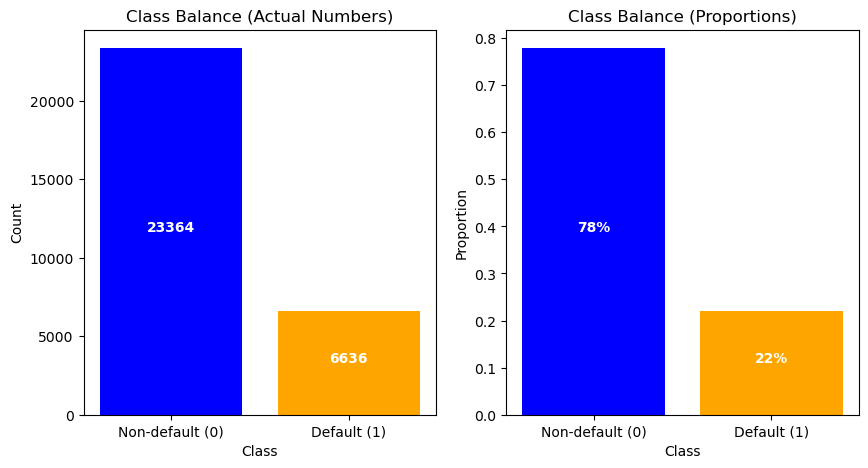

In [40]:
target_counts = credit_card_df['default.payment.next.month'].value_counts()
target_counts_normalized = credit_card_df['default.payment.next.month'].value_counts(normalize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(['Non-default (0)', 'Default (1)'], target_counts, color=['blue', 'orange'])
ax1.set_title('Class Balance (Actual Numbers)')
ax1.set_ylabel('Count')
ax1.set_xlabel('Class')

ax1.text(0, target_counts[0] / 2, str(target_counts[0]), ha='center', color='white', fontweight='bold')
ax1.text(1, target_counts[1] / 2, str(target_counts[1]), ha='center', color='white', fontweight='bold')

ax2.bar(['Non-default (0)', 'Default (1)'], target_counts_normalized, color=['blue', 'orange'])
ax2.set_title('Class Balance (Proportions)')
ax2.set_ylabel('Proportion')
ax2.set_xlabel('Class')

non_default_ratio = int(np.round(target_counts_normalized[0] * 100))
default_ratio = int(np.round(target_counts_normalized[1] * 100))
ax2.text(0, target_counts_normalized[0] / 2, f'{non_default_ratio}%', ha='center', color='white', fontweight='bold')
ax2.text(1, target_counts_normalized[1] / 2, f'{default_ratio}%', ha='center', color='white', fontweight='bold')

plt.show()

Here we check for class imbalance in the target variable and visualize it. Since an uneven distribution can affect model performance, we don't want the model to become biased toward predicting that class. Identifying this imbalance helps us decide whether to apply techniques like adjusting class weights to ensure balanced predictions.

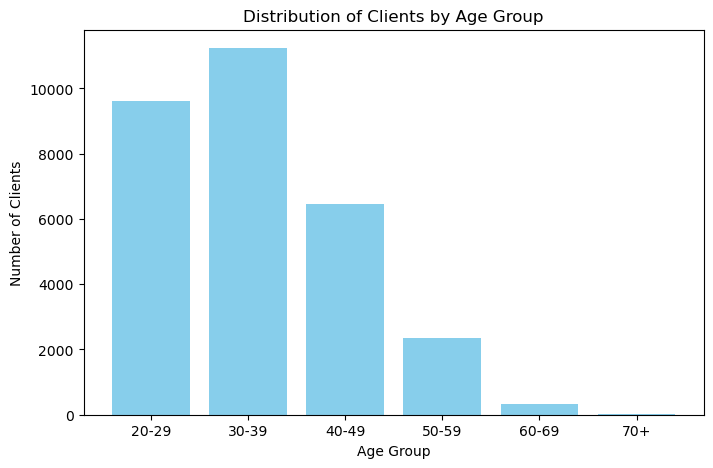

In [41]:
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']

age_group_counts = pd.cut(credit_card_df['AGE'], bins=age_bins, labels=age_labels, right=False).value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(age_group_counts.index, age_group_counts.values, color='skyblue')
plt.title('Distribution of Clients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Clients')

plt.show()

This plot shows the distribution of clients by age group, which provides insight into which age ranges are most represented in the dataset. Understanding this might be useful in identifying age-related trends or biases in the dataset that could influence our model prediction.

Our initial observations were the following: 

- **No missing data**: all columns contain 30,000 non-null values.
- **Financial variables**: The LIMIT_BAL, PAY, PAY_AMT, and BILL_AMT columns represent financial sums. They have large ranges and have high standard deviation. This implies that diverse payment behavior exists across the data set. 
- **Categorical variables**: SEX, EDUCATION, and MARRIAGE are categorical variables which were encoded as numeric in the columns of the data set. Some of these columns contain ambiguous entries (ex. 0 or 5) that may need to be encoded as an "other" category during preprocessing.
- **Class imbalance**: There is roughly a 78:22 class imbalance between the non-default (0) and default (1) classes. This suggests that some adjustments _might_ be necessary to prevent the model from being biased towards predicting the majority class.
- **Age range**: All clients in the data set range from 21-79. This suggests that the data set is targeted towards adult users with active credit card usage.

After examining our findings and the wider context of the problem, we chose to focus on the following scoring metrics, ranked below in order of priority:
1. **Recall**: Minimizing false positives, predicting that a client will _not default (0)_ when they actually _default (1)_. False positives can be incredibly costly for financial institutions, as they could potentially lose large sums of money by failing to correctly identify a defaulter. Since the defaulter has already incurred costs on their behalf, such costs should be minimized as much as possible to offset losses.
2. **Precision**: Minimizing false negatives, predicting that a client will _default (1)_ when they actually _do not default (0)_. We reasoned that false negatives were much less costly, since the institution misses out on potential gains (i.e denying credit to customers who can actually pay) but do not incur any losses by doing so, which is ultimately better for its financial health.

Some other metrics of interest were the **F1-score** (since precision and recall are fairly important in this case), and the **ROC AUC curve** (since our dataset is slightly imbalanced, so it would be useful to visualize the performance of the model across thresholds).

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [42]:
# Adjusting column names for readability and ease of preprocessing, based on feature descriptions from Kaggle
adjusted_column_names = {
    'LIMIT_BAL': 'credit_limit', 
    'SEX': 'sex',
    'EDUCATION': 'education',
    'MARRIAGE': 'marital_status',
    'AGE': 'age',
    'PAY_0': 'repay_status_sep',
    'PAY_2': 'repay_status_aug',
    'PAY_3': 'repay_status_jul',
    'PAY_4': 'repay_status_jun',
    'PAY_5': 'repay_status_may',
    'PAY_6': 'repay_status_apr',
    'BILL_AMT1': 'bill_amount_sep', 
    'BILL_AMT2': 'bill_amount_aug',
    'BILL_AMT3': 'bill_amount_jul',
    'BILL_AMT4': 'bill_amount_jun',
    'BILL_AMT5': 'bill_amount_may',
    'BILL_AMT6': 'bill_amount_apr',
    'PAY_AMT1': 'amount_paid_sep',
    'PAY_AMT2': 'amount_paid_aug',
    'PAY_AMT3': 'amount_paid_jul',
    'PAY_AMT4': 'amount_paid_jun',
    'PAY_AMT5': 'amount_paid_may',
    'PAY_AMT6': 'amount_paid_apr',
    'default.payment.next.month': 'default_next_month'
}

credit_card_df = credit_card_df.rename(columns=adjusted_column_names)

In [43]:
# Mapping numerical feature values to human-readable labels in categorical features  
# Sex 
credit_card_df['sex'] = credit_card_df['sex'].replace({1: 'male', 2: 'female'})

# Education
credit_card_df['education'] = credit_card_df['education'].replace({0: 4, 5: 4, 6: 4})
credit_card_df['education'] = credit_card_df['education'].replace({1: 'graduate school', 2: 'university', 
                                                                   3: 'high school', 4: 'others'})
# Marital status
credit_card_df['marital_status'] = credit_card_df['marital_status'].replace({0: 'others', 1: 'married', 2: 'single', 3: 'others'})

credit_card_df[['sex', 'education', 'marital_status']].head()

,sex,education,marital_status
ID,,,
1,female,university,married
2,female,university,single
3,female,university,single
4,female,university,married
5,male,university,married


In [44]:
# Clean up repayment status column, condense repayment_status columns into average payment delay 
repayment_status_feats = ['repay_status_sep', 'repay_status_aug', 'repay_status_jul', 
                          'repay_status_jun', 'repay_status_may', 'repay_status_apr']
credit_card_df[repayment_status_feats] = credit_card_df[repayment_status_feats].replace({-1: 0, -2: 0})
credit_card_df['average_payment_delay'] = credit_card_df[repayment_status_feats].mean(axis=1)

credit_card_df[['average_payment_delay']].head()

,average_payment_delay
ID,
1,0.666667
2,0.666667
3,0.000000
4,0.000000
5,0.000000


In [45]:
# Merging bill_amount and amount_paid columns into balance_due columns
# balance_due is the difference of bill_amount and amount_paid
balance_due_cols = ['balance_due_sep', 'balance_due_aug', 'balance_due_jul', 'balance_due_jun', 'balance_due_may', 'balance_due_apr']

credit_card_df['balance_due_sep'] = credit_card_df['bill_amount_sep'] - credit_card_df['amount_paid_sep']
credit_card_df['balance_due_aug'] = credit_card_df['bill_amount_aug'] - credit_card_df['amount_paid_aug']
credit_card_df['balance_due_jul'] = credit_card_df['bill_amount_jul'] - credit_card_df['amount_paid_jul']
credit_card_df['balance_due_jun'] = credit_card_df['bill_amount_jun'] - credit_card_df['amount_paid_jun']
credit_card_df['balance_due_may'] = credit_card_df['bill_amount_may'] - credit_card_df['amount_paid_may']
credit_card_df['balance_due_apr'] = credit_card_df['bill_amount_apr'] - credit_card_df['amount_paid_apr']

credit_card_df[balance_due_cols].head()

,balance_due_sep,balance_due_aug,balance_due_jul,balance_due_jun,balance_due_may,balance_due_apr
ID,,,,,,
1,3913.0,2413.0,689.0,0.0,0.0,0.0
2,2682.0,725.0,1682.0,2272.0,3455.0,1261.0
3,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0
4,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0
5,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [46]:
numeric_features = ['credit_limit', 'average_payment_delay', 'balance_due_sep', 'balance_due_aug', 'balance_due_jul', 
                    'balance_due_jun', 'balance_due_may', 'balance_due_apr', 'repay_status_sep', 'repay_status_aug', 'repay_status_jul', 
                    'repay_status_jun', 'repay_status_may', 'repay_status_apr']
discretization_features = ['age']
categorical_features = ['marital_status'] 
ordinal_features = ['education']
binary_features = ['sex']
drop_features = ['bill_amount_sep', 'bill_amount_aug', 'bill_amount_jul', 'bill_amount_jun', 'bill_amount_may',
                 'bill_amount_apr', 'amount_paid_sep', 'amount_paid_aug', 'amount_paid_jul', 'amount_paid_jun', 'amount_paid_may',
                 'amount_paid_apr']
target = 'default_next_month'

In [47]:
# Define our ColumnTransformer object(s)

# Numeric features 
numeric_transformer = StandardScaler()

# Discretization features
discretization_transformer = KBinsDiscretizer(n_bins=5, encode="onehot")

# Categorical features
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Ordinal features 
education_levels = [
    "high school",
    "university",
    "graduate school",
    "others"
]
assert set(education_levels) == set(credit_card_df['education'].unique())
ordinal_transformer = OrdinalEncoder(categories=[education_levels], dtype=int)

# Binary features 
binary_transformer = OneHotEncoder(drop="if_binary", dtype=int)

In [48]:
# Define our preprocessor
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (discretization_transformer, discretization_features),
    (ordinal_transformer, ordinal_features),  
    (binary_transformer, binary_features),    
    (categorical_transformer, categorical_features),
    ("drop", drop_features),
)

In [49]:
# Move target column to the right of the DataFrame
target_col = credit_card_df.pop('default_next_month')
credit_card_df.insert(credit_card_df.shape[1], 'default_next_month', target_col)

# Visualize our transformed DataFrame
credit_card_df.drop(columns=drop_features) # For visualization purposes only

,credit_limit,sex,education,marital_status,age,repay_status_sep,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,repay_status_apr,average_payment_delay,balance_due_sep,balance_due_aug,balance_due_jul,balance_due_jun,balance_due_may,balance_due_apr,default_next_month
ID,,,,,,,,,,,,,,,,,,,
1,20000.0,female,university,married,24,2,2,0,0,0,0,0.666667,3913.0,2413.0,689.0,0.0,0.0,0.0,1
2,120000.0,female,university,single,26,0,2,0,0,0,2,0.666667,2682.0,725.0,1682.0,2272.0,3455.0,1261.0,1
3,90000.0,female,university,single,34,0,0,0,0,0,0,0.000000,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0,0
4,50000.0,female,university,married,37,0,0,0,0,0,0,0.000000,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0,0
5,50000.0,male,university,married,57,0,0,0,0,0,0,0.000000,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,male,high school,married,39,0,0,0,0,0,0,0.000000,180448.0,172815.0,203362.0,84957.0,26237.0,14980.0,0
29997,150000.0,male,high school,single,43,0,0,0,0,0,0,0.000000,-154.0,-1698.0,-5496.0,8850.0,5190.0,0.0,0
29998,30000.0,male,university,single,37,4,3,2,0,0,0,1.500000,3565.0,3356.0,-19242.0,16678.0,18582.0,16257.0,1


Shown above is a visualization of our `DataFrame` with feature engineering and dropping unnecessary features, but **BEFORE** applying preprocessing steps.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [50]:
# dictionary to store results
results = {}

# set the scoring metric
scoring_metrics = ['precision', 'recall', 'f1_weighted', 'accuracy']

# using cross val function from hw3
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.4f (+/- %0.4f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [51]:
# splitting the data
X = credit_card_df.drop(columns=target)
y = credit_card_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

# creating model
dummy = DummyClassifier(strategy="most_frequent")

# making pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)

# storing results
dummy_score = mean_std_cross_val_scores(dummy_pipe, X_train, y_train, cv=5, return_train_score=True)

pd.DataFrame(dummy_score, columns=['dummy']).T

,fit_time,score_time,test_score,train_score
dummy,0.0187 (+/- 0.0022),0.0060 (+/- 0.0008),0.7768 (+/- 0.0001),0.7768 (+/- 0.0000)


It's important to note that the `DummyClassifier` uses accuracy for `test_score` and `train score`. Since we are using recall and precision as our scoring metrics, the values for the baseline model would be 0 and undefined respectively. This makes sense as we know there is a class imbalance, and because the strategy of the baseline model is to predict the most frequent class (negative), no positives will be predicted. Thus, there will be no true positives and recall will be 0. Similarily, for precision, there will also be no true positives but also no false positives making the score 0/0.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

In [52]:
# Trying a linear model, using logistic regression and tuning hyperparameters
param_grid = {"C": 10.0 ** np.arange(-4, 6, 1)}
results_C = {}

for c in param_grid["C"]:
    lr_pipe = make_pipeline(
        preprocessor,
        LogisticRegression(max_iter=1000, C=c, class_weight='balanced', random_state=123))
    results_C["logistic regression C=" + str(c)] = mean_std_cross_val_scores(lr_pipe, X_train, y_train, cv=5, return_train_score=True, scoring=scoring_metrics)

pd.DataFrame(results_C).T

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1_weighted,train_f1_weighted,test_accuracy,train_accuracy
logistic regression C=0.0001,0.0270 (+/- 0.0060),0.0103 (+/- 0.0003),0.5512 (+/- 0.0162),0.5517 (+/- 0.0044),0.5160 (+/- 0.0087),0.5166 (+/- 0.0026),0.7957 (+/- 0.0056),0.7960 (+/- 0.0016),0.7980 (+/- 0.0063),0.7984 (+/- 0.0017)
logistic regression C=0.001,0.0271 (+/- 0.0014),0.0099 (+/- 0.0003),0.5227 (+/- 0.0149),0.5226 (+/- 0.0044),0.5506 (+/- 0.0087),0.5500 (+/- 0.0014),0.7893 (+/- 0.0058),0.7893 (+/- 0.0016),0.7873 (+/- 0.0068),0.7874 (+/- 0.0019)
logistic regression C=0.01,0.0313 (+/- 0.0008),0.0102 (+/- 0.0003),0.5091 (+/- 0.0139),0.5102 (+/- 0.0049),0.5610 (+/- 0.0078),0.5617 (+/- 0.0012),0.7848 (+/- 0.0059),0.7854 (+/- 0.0020),0.7811 (+/- 0.0068),0.7818 (+/- 0.0023)
logistic regression C=0.1,0.0296 (+/- 0.0011),0.0107 (+/- 0.0007),0.5071 (+/- 0.0152),0.5081 (+/- 0.0050),0.5612 (+/- 0.0092),0.5631 (+/- 0.0018),0.7840 (+/- 0.0066),0.7846 (+/- 0.0020),0.7801 (+/- 0.0075),0.7807 (+/- 0.0024)
logistic regression C=1.0,0.0306 (+/- 0.0034),0.0112 (+/- 0.0008),0.5071 (+/- 0.0151),0.5079 (+/- 0.0049),0.5612 (+/- 0.0091),0.5630 (+/- 0.0020),0.7840 (+/- 0.0065),0.7846 (+/- 0.0020),0.7801 (+/- 0.0075),0.7807 (+/- 0.0024)
logistic regression C=10.0,0.0294 (+/- 0.0029),0.0107 (+/- 0.0011),0.5071 (+/- 0.0151),0.5079 (+/- 0.0049),0.5612 (+/- 0.0091),0.5631 (+/- 0.0020),0.7840 (+/- 0.0065),0.7846 (+/- 0.0020),0.7801 (+/- 0.0075),0.7807 (+/- 0.0024)
logistic regression C=100.0,0.0296 (+/- 0.0023),0.0105 (+/- 0.0003),0.5071 (+/- 0.0151),0.5079 (+/- 0.0049),0.5612 (+/- 0.0091),0.5631 (+/- 0.0020),0.7840 (+/- 0.0065),0.7846 (+/- 0.0020),0.7801 (+/- 0.0075),0.7807 (+/- 0.0024)
logistic regression C=1000.0,0.0287 (+/- 0.0025),0.0104 (+/- 0.0002),0.5071 (+/- 0.0151),0.5079 (+/- 0.0049),0.5612 (+/- 0.0091),0.5631 (+/- 0.0020),0.7840 (+/- 0.0065),0.7846 (+/- 0.0020),0.7801 (+/- 0.0075),0.7807 (+/- 0.0024)
logistic regression C=10000.0,0.0283 (+/- 0.0022),0.0101 (+/- 0.0003),0.5071 (+/- 0.0151),0.5079 (+/- 0.0049),0.5612 (+/- 0.0091),0.5631 (+/- 0.0020),0.7840 (+/- 0.0065),0.7846 (+/- 0.0020),0.7801 (+/- 0.0075),0.7807 (+/- 0.0024)
logistic regression C=100000.0,0.0287 (+/- 0.0023),0.0103 (+/- 0.0004),0.5071 (+/- 0.0151),0.5079 (+/- 0.0049),0.5612 (+/- 0.0091),0.5631 (+/- 0.0020),0.7840 (+/- 0.0065),0.7846 (+/- 0.0020),0.7801 (+/- 0.0075),0.7807 (+/- 0.0024)


Note that the **standard deviation** is reported in the cross-validation scores above as the uncertainty for each scoring metric.

Since we are prioritizing higher recall and F1-score, we will choose the value of `C` with the highest recall, since the accuracies of the model at each C are fairly consistent. We chose `C=10` as our best `C`. 

In [53]:
best_C_lr = 10

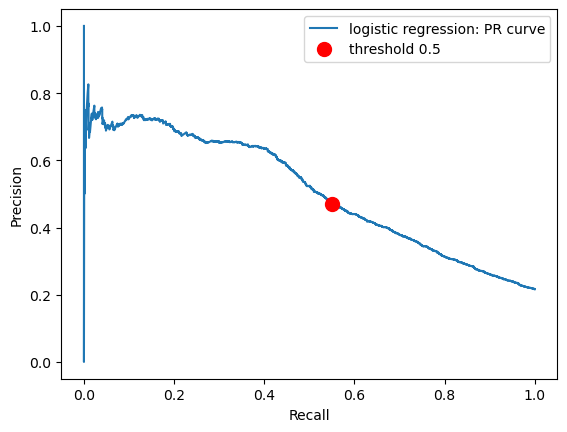

In [54]:
lr_pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, C=10, random_state=123, class_weight='balanced'))
lr_pipe.fit(X_train, y_train)

# adapted from lecture 9
precision, recall, thresholds = precision_recall_curve(
    y_test, lr_pipe.predict_proba(X_test)[:, 1]
)
plt.plot(recall, precision, label="logistic regression: PR curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(
    recall_score(y_test, lr_pipe.predict(X_test)),
    precision_score(y_test, lr_pipe.predict(X_test)),    
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best", fontsize=10);

In [55]:
# Creating best model for LogisticRegression
lr_pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, C=best_C_lr, class_weight = 'balanced'))
lr_pipe.fit(X_train, y_train)

print(classification_report(y_train, lr_pipe.predict(X_train), target_names=["will not default", "will default"]))

                  precision    recall  f1-score   support

will not default       0.87      0.84      0.86     16312
    will default       0.51      0.56      0.53      4688

        accuracy                           0.78     21000
       macro avg       0.69      0.70      0.70     21000
    weighted avg       0.79      0.78      0.78     21000



The classification report above shows that the average accuracy for our model with `C=10`is 0.78, precision is 0.69, recall is 0.7, and our f1-score is 0.70. These are taken from the `macro avg` row of the classification report. Our weighted average is slightly higher than our computed macro average.

While these look promising, looking at the individual statistics with respect to their target labels reveal that the `LogisticRegression` model is biased towards the majority class. The discrepancy between precision, recall, and F1-score is extremely large between the two classes. 

Based on the scores, we can see that both recall and precision for the minority class is at around 0.5, which indicates the model is not performing as well as intended. This is due to a class imbalance and even with manual hyperparameter tuning for C and balancing class weights, we are unable to get it higher. Thus, it would be a good idea to try other models as well.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

In [57]:
# creating models (adapted from hw3)
models = {
    "logistic regression": LogisticRegression(max_iter=1000, C=best_C_lr, random_state=123, class_weight='balanced'),
    "random forests": RandomForestClassifier(n_jobs=-1, random_state=123, class_weight="balanced"),
    "decision tree": DecisionTreeClassifier(random_state=123, class_weight="balanced"),
    "RBF SVM": SVC(random_state=123, class_weight="balanced")
}

# cross validating models + storing results
for model_str, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    results[model_str] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True, scoring=scoring_metrics)

pd.DataFrame(results).T

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1_weighted,train_f1_weighted,test_accuracy,train_accuracy
logistic regression,0.0308 (+/- 0.0044),0.0116 (+/- 0.0020),0.5071 (+/- 0.0151),0.5079 (+/- 0.0049),0.5612 (+/- 0.0091),0.5631 (+/- 0.0020),0.7840 (+/- 0.0065),0.7846 (+/- 0.0020),0.7801 (+/- 0.0075),0.7807 (+/- 0.0024)
random forests,0.2978 (+/- 0.0119),0.0405 (+/- 0.0047),0.6449 (+/- 0.0199),0.9904 (+/- 0.0008),0.3663 (+/- 0.0055),0.9980 (+/- 0.0002),0.7932 (+/- 0.0039),0.9974 (+/- 0.0002),0.8134 (+/- 0.0041),0.9974 (+/- 0.0002)
decision tree,0.1718 (+/- 0.0042),0.0116 (+/- 0.0006),0.3914 (+/- 0.0149),0.9864 (+/- 0.0008),0.3959 (+/- 0.0136),0.9999 (+/- 0.0001),0.7282 (+/- 0.0069),0.9969 (+/- 0.0002),0.7276 (+/- 0.0079),0.9969 (+/- 0.0002)
RBF SVM,7.8115 (+/- 0.1431),1.6240 (+/- 0.0180),0.4651 (+/- 0.0117),0.4789 (+/- 0.0044),0.6131 (+/- 0.0117),0.6298 (+/- 0.0018),0.7670 (+/- 0.0063),0.7748 (+/- 0.0022),0.7561 (+/- 0.0073),0.7643 (+/- 0.0027)


Looking at the various scoring metrics for each model, both random forests and decision trees are clearly overfitting on the training set as the scores are close to 1, and the gap between `train` and `test` scoring metrics are extremely large. The RBF SVM model is not overfitting and is performing slightly better than the linear model, although the recall and precision leave much to be desired. These results indicate further hyperparameter optimization is required.

Out of the three models we tested, the RBF SVM looks the most promising to challenge the linear model. Both models have similar performance metrics within roughly the same range. The most important difference between both models is the fitting time and score time. As shown above, the RBF SVM has a significantly higher scoring and fitting time, which may become an issue as the number of data points increases.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

In [58]:
# dictionary to store results
feature_select_res = {}

for model_str, model in models.items():
    # skip svm
    if model_str == 'RBF SVM':
        continue
    
    rfe_pipe = make_pipeline(
        preprocessor,
        RFECV(model, cv=5))

    results_rfecv = mean_std_cross_val_scores(rfe_pipe, X_train, y_train, return_train_score=True, scoring=scoring_metrics)
    feature_select_res[model_str] = results_rfecv

print("Feature Selection scores with RFECV")
pd.DataFrame(feature_select_res).T

Feature Selection scores with RFECV


,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1_weighted,train_f1_weighted,test_accuracy,train_accuracy
logistic regression,1.8114 (+/- 0.1405),0.0153 (+/- 0.0063),0.5158 (+/- 0.0225),0.5185 (+/- 0.0147),0.5203 (+/- 0.0391),0.5214 (+/- 0.0426),0.7834 (+/- 0.0050),0.7847 (+/- 0.0028),0.7830 (+/- 0.0088),0.7846 (+/- 0.0051)
random forests,41.2522 (+/- 2.4850),0.0407 (+/- 0.0067),0.6471 (+/- 0.0212),0.9902 (+/- 0.0006),0.3660 (+/- 0.0093),0.9981 (+/- 0.0003),0.7935 (+/- 0.0047),0.9974 (+/- 0.0001),0.8139 (+/- 0.0047),0.9974 (+/- 0.0001)
decision tree,13.5611 (+/- 1.0162),0.0117 (+/- 0.0006),0.3948 (+/- 0.0079),0.9742 (+/- 0.0194),0.4034 (+/- 0.0098),0.9986 (+/- 0.0022),0.7298 (+/- 0.0036),0.9937 (+/- 0.0051),0.7288 (+/- 0.0039),0.9937 (+/- 0.0051)


In [59]:
print("No Feature Selection")
pd.DataFrame(results).T

No Feature Selection


,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1_weighted,train_f1_weighted,test_accuracy,train_accuracy
logistic regression,0.0308 (+/- 0.0044),0.0116 (+/- 0.0020),0.5071 (+/- 0.0151),0.5079 (+/- 0.0049),0.5612 (+/- 0.0091),0.5631 (+/- 0.0020),0.7840 (+/- 0.0065),0.7846 (+/- 0.0020),0.7801 (+/- 0.0075),0.7807 (+/- 0.0024)
random forests,0.2978 (+/- 0.0119),0.0405 (+/- 0.0047),0.6449 (+/- 0.0199),0.9904 (+/- 0.0008),0.3663 (+/- 0.0055),0.9980 (+/- 0.0002),0.7932 (+/- 0.0039),0.9974 (+/- 0.0002),0.8134 (+/- 0.0041),0.9974 (+/- 0.0002)
decision tree,0.1718 (+/- 0.0042),0.0116 (+/- 0.0006),0.3914 (+/- 0.0149),0.9864 (+/- 0.0008),0.3959 (+/- 0.0136),0.9999 (+/- 0.0001),0.7282 (+/- 0.0069),0.9969 (+/- 0.0002),0.7276 (+/- 0.0079),0.9969 (+/- 0.0002)
RBF SVM,7.8115 (+/- 0.1431),1.6240 (+/- 0.0180),0.4651 (+/- 0.0117),0.4789 (+/- 0.0044),0.6131 (+/- 0.0117),0.6298 (+/- 0.0018),0.7670 (+/- 0.0063),0.7748 (+/- 0.0022),0.7561 (+/- 0.0073),0.7643 (+/- 0.0027)


Comparing the table above (feature selection) and below (no feature selection), the results using feature selection do not significantly improve any of the scoring metrics and have a substantial fit time. Because of this negative tradeoff, we will continue without using feature feature selection.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

In [60]:
# parameter grids
param_grid_rf = {
    'randomforestclassifier__n_estimators': np.arange(100, 300),
    'randomforestclassifier__max_features': np.arange(10, 1000),
    'randomforestclassifier__max_depth': np.arange(10, 100),
}

param_grid_dt = {
    'decisiontreeclassifier__max_depth': np.arange(1, 11),
}

param_grid_svc = {
    'svc__C': np.logspace(-4, -1, 10),
    'svc__gamma': np.logspace(-1, 1, 10),
}

# Create pipelines
pipelines = {
    "random forests": make_pipeline(preprocessor, RandomForestClassifier(random_state=123, class_weight="balanced")),
    "decision tree": make_pipeline(preprocessor, DecisionTreeClassifier(random_state=123, class_weight="balanced")),
    "RBF SVM": make_pipeline(preprocessor, SVC(probability=True, random_state=123, class_weight="balanced"))
}

In [61]:
# optimization for random forests
best_n_estimators = None
best_max_features = None
best_max_depth_rf = None

rand_search_rf = RandomizedSearchCV(pipelines["random forests"], param_grid_rf, n_iter=10, cv=5, scoring='f1_weighted', random_state=123, n_jobs=-1, refit=True)
rand_search_rf.fit(X_train, y_train)
best_n_estimators = rand_search_rf.best_params_["randomforestclassifier__n_estimators"]
best_max_features = rand_search_rf.best_params_["randomforestclassifier__max_features"]
best_max_depth_rf = rand_search_rf.best_params_["randomforestclassifier__max_depth"]
best_score_rf = rand_search_rf.best_score_
best_score_rf

0.7963494645878807

In [62]:
# optimization for decision tree
best_max_depth_dt = None

rand_search_dt = RandomizedSearchCV(pipelines["decision tree"], param_grid_dt, n_iter=10, cv=5, scoring='f1_weighted', random_state=123, n_jobs=-1, refit=True)
rand_search_dt.fit(X_train, y_train)
best_max_depth_dt = rand_search_dt.best_params_["decisiontreeclassifier__max_depth"]
best_score_dt = rand_search_dt.best_score_
best_score_dt

0.7681638190424496

In [63]:
# optimization for svc
best_C_svc = None
best_gamma_svc = None

rand_search_svc = RandomizedSearchCV(pipelines["RBF SVM"], param_grid_svc, n_iter=5, cv=5, scoring='f1_weighted', random_state=123, n_jobs=-1)
rand_search_svc.fit(X_train, y_train)
best_C_svc = rand_search_svc.best_params_["svc__C"]
best_gamma_svc = rand_search_svc.best_params_["svc__gamma"]
best_score_svc = rand_search_svc.best_score_
best_score_svc

0.7486837055764796

In [64]:
print(best_n_estimators)
print(best_max_features)
print(best_max_depth_rf)

print(best_max_depth_dt)

print(best_C_svc)
print(best_gamma_svc)

213
686
18
5
0.021544346900318822
0.1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [65]:
pipe_dt = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=123, class_weight="balanced"))

# adapted from lect 13
pipe_dt.fit(X_train, y_train)

feature_names = preprocessor.get_feature_names_out()

data = {
    "Importance": pipe_dt.named_steps["decisiontreeclassifier"].feature_importances_,
}
pd.DataFrame(data=data, index=feature_names).sort_values(
    by="Importance", ascending=False
)[:25]

,Importance
standardscaler__average_payment_delay,0.187912
standardscaler__balance_due_sep,0.110424
standardscaler__balance_due_may,0.096329
standardscaler__balance_due_jun,0.093054
standardscaler__balance_due_jul,0.092551
standardscaler__balance_due_aug,0.092067
standardscaler__balance_due_apr,0.092051
standardscaler__credit_limit,0.083449
standardscaler__repay_status_sep,0.035274
ordinalencoder__education,0.020572


Based on the values, it seems like the most important feature is the average payment delay, which makes sense in relation to our target. The balances in each month all have a relatively equal importance in relation to each other, but does become more impactful as the month approaches the current date, which is as we had planned in our preprocessing. There are no unexpected features that are considered important as the other features are expectedly significantly less important when determining the class as they are intuitively much less correlated to the target.

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [66]:
# final random forest model + score
final_pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=123, class_weight="balanced", max_depth=best_max_depth_rf, n_estimators=best_n_estimators, max_features=best_max_features))
final_pipe_rf.fit(X_train, y_train)

y_pred_rf = final_pipe_rf.predict(X_test)

accuracy_rf = final_pipe_rf.score(X_test, y_test)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("accuracy: {:.7f}".format(accuracy_rf))
print("precision: {:.7f}".format(precision_rf))
print("recall: {:.7f}".format(recall_rf))
print("f1 score (weighted): {:.7f}".format(f1_rf))

accuracy: 0.8037778
precision: 0.5558968
recall: 0.4645791
f1 score (weighted): 0.7971749


We decided to select our Random Forest model as our final/best perfoming model. Although the linear model looked promising, we felt that the random forest model overall had slightly better scoring metrics in terms of weighted f1 score and accuracy. Looking at the final scoring metrics for our best model on the test set, they generally do agree with the validation scores above. It is important to note that the precision and recall are on the lower side but this is a result of the class imbalance, as our weighted f1 score is decent. Because of this, we cannot fully trust our results as our model will still be making mistakes during prediciton, as a recall score of around 0.46 means there are still quite a few false negatives, which we had previously stated to be harmful. Lastly, we did note that the random forest model was overfitting on the training data prior to hyperparameter optimization, but this issue was resolved later on. We do not feel like there have been persistent issues with optimization bias, as the training and cross validation scores have not indicated that, and they generally do not have high variance or values extremely close to 1.0.

Using SHAP force plots, we will look at 2 test predictions (one positive and one negative). First, lets confirm the target classes for these two examples.

In [67]:
# positive ex (default)
ex1_idx = X_test.index.get_loc(2415)
print("Index: " + str(ex1_idx) + " (class: " + str(y_test.iloc[ex1_idx]) + ")")


# neg ex (not default)
ex2_idx = X_test.index.get_loc(25666)
print("Index: " + str(ex2_idx) + " (class: " + str(y_test.iloc[ex2_idx]) + ")")

Index: 8998 (class: 1)
Index: 0 (class: 0)


Recall that class 1 is our positive case, which indicates the individual will default on their payment, and class 0 is the negative case, where they will not default. Next, we will create the shap waterfall plots for these individual predictions.

In [ ]:
# adapted from lecture 13
shap.initjs()

X_train_enc = preprocessor.transform(X_train)
X_test_enc = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()

X_train_enc_df = pd.DataFrame(X_train_enc, columns=feature_names, index=X_train.index)
X_test_enc_df = pd.DataFrame(X_test_enc, columns=feature_names, index=X_test.index)

explainer = shap.TreeExplainer(final_pipe_rf.named_steps['randomforestclassifier']) # define the shap explainer 

test_shap_values = explainer(X_test_enc_df) # test shap values 

pred_ex1 = final_pipe_rf.predict(X_test)[ex1_idx]
pred_proba_ex1 = final_pipe_rf.predict_proba(X_test)[ex1_idx]

pred_ex2 = final_pipe_rf.predict(X_test)[ex2_idx]
pred_proba_ex2 = final_pipe_rf.predict_proba(X_test)[ex2_idx]

The average predicted value for all examples in our training set was E(x) = -2.03. In the first example, the model prediction f(x) for the specific example is f(x) = 0.633 and in the second, the prediction was f(x) = -0.612.

In [ ]:
shap.plots.waterfall(test_shap_values[ex1_idx])

In [ ]:
shap.plots.waterfall(test_shap_values[ex2_idx])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

# CONCLUDING REMARKS

# DISCUSSION OF OTHER IDEAS

# FINAL TEST SCORE

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

Our biggest takeaway from the machine learning material so far is that success in machine learning does not come from the model alone. Earlier in the course, we learned that the foundations of machine learning lie in these machines' abilities to learn from data through repeated cycles of training and testing. Despite this, we learn about multiple ways to optimize and fine-tune this process to point our model in the right direction. 

Thoroughly understanding the data deeply before diving into model training is extremely important. It involves exploring and analyzing the data to understand its structure and distribution. Supervised learning models are only as good as the data they’re trained on, so spending time on preprocessing is critical to ensuring that the model is learning meaningful patterns.

Another insight is the value of feature engineering. Machine learning models don’t inherently know which features are the most important or the most relevant to the target variable, so it's up to us to decide which features to include. 

Hyperparameter optimization has also been a significant part of building effective models. Different algorithms have different parameters that control model behavior. Tuning these parameters through these techniques allows us to fine-tune the model's complexity and avoid underfitting or overfitting. 

Succeeding in machine learning requires a combination of a multitude of conscientious choices made by the model builder, which requires both technical skill and critical thinking to make sure our models are not only accurate but also generalizable and reliable in real-world applications.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)